In [1]:
# Connaitre le path du fichier
!pwd

/Users/mtl/Projets/itescia_esiee/esiee_2022_ia_tp_titanic


In [2]:
# Importation de la librairie Pandas
import pandas as pd

In [3]:
# Importation des données
df = pd.read_csv('datas/train.csv')

In [4]:
# Afficher le tableau de données
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Vérifier les valeur null
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.dropna(inplace=True, subset=["Age"])

In [7]:
df.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

In [8]:
pd.concat([pd.DataFrame(df.dtypes), pd.DataFrame(df.isnull().sum())], axis=1)

,0,0
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Sex,object,0
Age,float64,0
SibSp,int64,0
Parch,int64,0
Fare,float64,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
889,890,1,1,1,26.0,0,0,30.0000


In [11]:
df1=df.dropna()
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
889,890,1,1,1,26.0,0,0,30.0000


In [12]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [13]:
y = df1.Survived
x = df1.drop(['Survived'], axis = 1)

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)

In [16]:
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features=2, random_state=23)

In [17]:
#Train value
print ('train : ')
print (rf.score(x_train,y_train))

#Test value
print ('test : ')
print(rf.score(x_test,y_test))

train : 
1.0
test : 
0.8181818181818182


In [18]:
rf.score(x_test, y_test)

0.8181818181818182

In [19]:
#Explicabilité
#
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
pd.DataFrame(rf.feature_importances_*100,x_train.columns,columns = ['Importance en %'])

#pd.DataFrame(rf.feature_importances_, x_train.columns)

,Importance en %
PassengerId,18.384472
Pclass,8.224946
Sex,25.263626
Age,20.364216
SibSp,3.717061
Parch,3.700087
Fare,20.345593


In [20]:
import shap

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
shpv = shap.TreeExplainer(rf).shap_values(x_train)

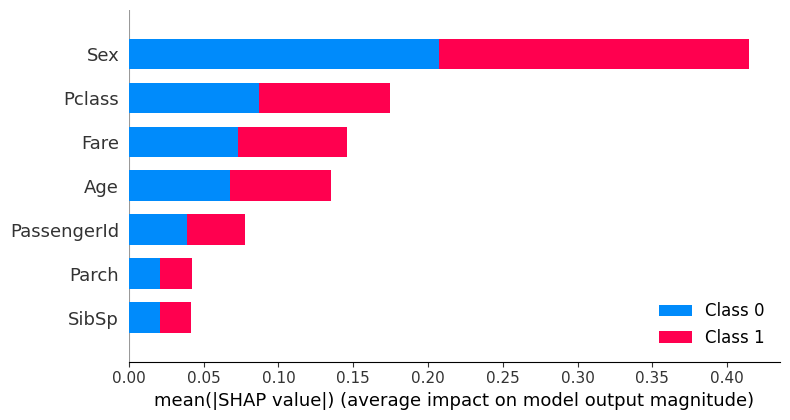

In [22]:
shap.summary_plot(shpv, x_train)